In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

from tqdm import tqdm

# Exploratory Data Analysis 
choosing which sensors to keep

In [2]:
col_1 = ['unit', 'time', 'op1', 'op2', 'op3']
col_2 = [f'sr{i+1}' for i in range(21)]
columns = col_1 + col_2

# Load datasets and assign column names
df = pd.read_csv(r'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\train_FD004.txt', delim_whitespace=True, header=None, names=columns)
test = pd.read_csv(r'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\test_FD004.txt', delim_whitespace=True, header=None, names=columns)

# Add features to training data
df['max_time'] = df.groupby('unit')['time'].transform('max')
df['remaining_time'] = df['max_time'] - df['time']
df['label'] = df['remaining_time'].clip(upper=130)

# Preview data
df.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr15,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,9.3335,0.02,330,2212,100.00,10.62,6.3670,321,320,130
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,9.1913,0.02,361,2324,100.00,24.37,14.6552,321,319,130
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,9.4007,0.02,329,2212,100.00,10.48,6.4213,321,318,130
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,9.3369,0.02,328,2212,100.00,10.54,6.4176,321,317,130
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,10.8366,0.02,305,1915,84.93,14.03,8.6754,321,316,130


In [3]:
test.head()

,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr12,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326


array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

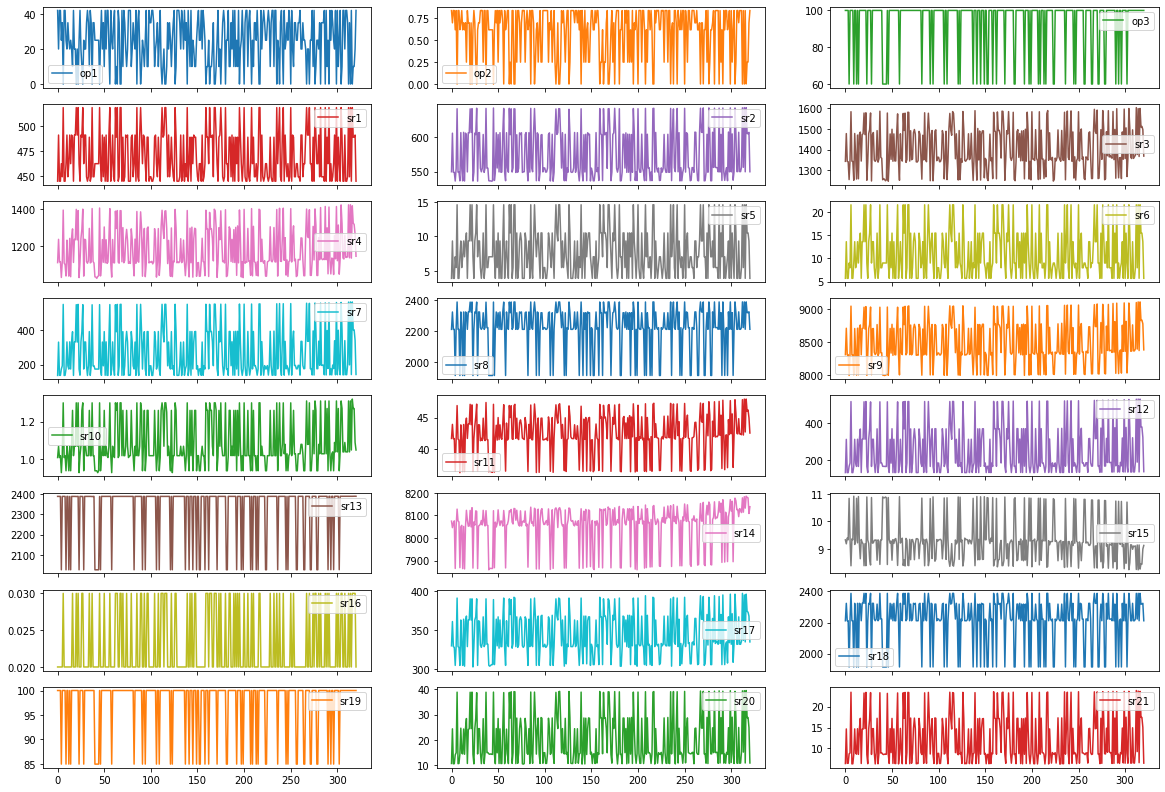

In [4]:
df_1=df[df['unit']==1].iloc[:,2:]
df_1[['op1', 'op2', 'op3','sr1', 'sr2', 'sr3', 'sr4', 'sr5', 'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
      'sr11', 'sr12', 'sr13', 'sr14', 'sr15', 'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']].plot(subplots=True, figsize=(20, 14), layout=(8, 3))

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

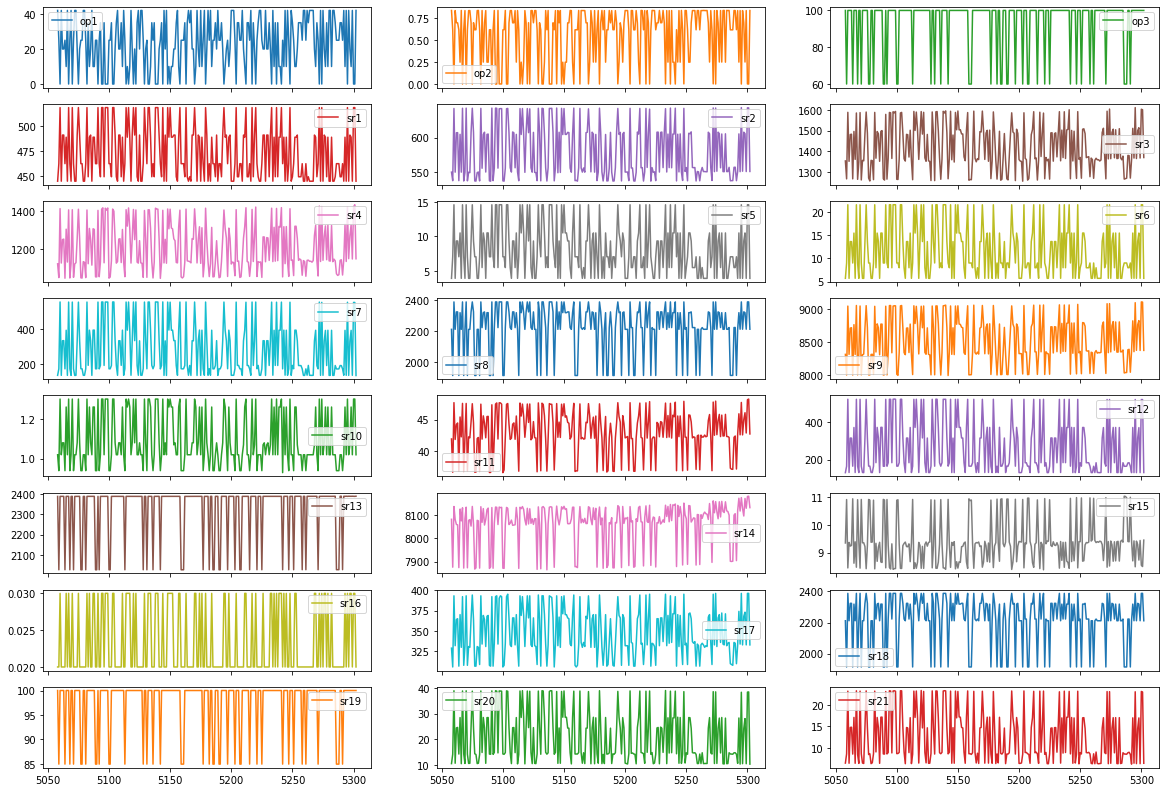

In [5]:
df_20=df[df['unit']==20].iloc[:,2:]
df_20[['op1', 'op2', 'op3','sr1', 'sr2', 'sr3', 'sr4', 'sr5', 'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
      'sr11', 'sr12', 'sr13', 'sr14', 'sr15', 'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']].plot(subplots=True, figsize=(20, 14), layout=(8, 3))

For FD002, we choose to remove all OP and keep all sensors

# Data processing for ML predictive modelling using TSfresh

In [6]:
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.utilities.dataframe_functions import roll_time_series
from tsfresh.feature_selection.relevance import calculate_relevance_table
from tsfresh.feature_extraction import EfficientFCParameters

In [7]:
window_size = 60
rolling_params = {
    "column_id": "unit",
    "column_sort": "time",
    "max_timeshift": window_size - 1,
    "min_timeshift": 5,
    "rolling_direction": 1
}

# Function to roll time series data per unit
def roll_per_unit(df, rolling_params):
    rolled_dfs = []
    unique_units = df['unit'].unique()
    
    # Loop over each unique unit
    for unit in unique_units:
        # Filter data for the current unit
        unit_df = df[df['unit'] == unit]
        
        # Apply rolling to this unit's data
        rolled_unit_df = roll_time_series(unit_df, **rolling_params)
        
        # Append the rolled data to the list
        rolled_dfs.append(rolled_unit_df)
    
    # Concatenate all rolled dataframes into one
    rolled_combined_df = pd.concat(rolled_dfs, axis=0).reset_index(drop=True)
    
    return rolled_combined_df

# Apply rolling per unit on FD004 training data
rolled_df = roll_per_unit(df, rolling_params)

rolled_df

Rolling: 100%|██████████| 51/51 [00:05<00:00,  8.92it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr16,sr17,sr18,sr19,sr20,sr21,max_time,remaining_time,label,id
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,0.02,330,2212,100.00,10.62,6.3670,321,320,130,"(1, 6)"
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,0.02,361,2324,100.00,24.37,14.6552,321,319,130,"(1, 6)"
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,0.02,329,2212,100.00,10.48,6.4213,321,318,130,"(1, 6)"
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,0.02,328,2212,100.00,10.54,6.4176,321,317,130,"(1, 6)"
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,0.02,305,1915,84.93,14.03,8.6754,321,316,130,"(1, 6)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230470,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,0.03,372,2319,100.00,29.11,17.5234,255,4,4,"(249, 255)"
3230471,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,0.03,396,2388,100.00,39.38,23.7151,255,3,3,"(249, 255)"
3230472,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,0.03,395,2388,100.00,39.78,23.8270,255,2,2,"(249, 255)"
3230473,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,0.02,337,2223,100.00,15.26,9.0774,255,1,1,"(249, 255)"


In [8]:
rolled_test = roll_per_unit(test, rolling_params)

rolled_test

Rolling: 100%|██████████| 57/57 [00:03<00:00, 16.76it/s]


,unit,time,op1,op2,op3,sr1,sr2,sr3,sr4,sr5,...,sr13,sr14,sr15,sr16,sr17,sr18,sr19,sr20,sr21,id
0,1,1,20.0072,0.7000,100.0,491.19,606.67,1481.04,1227.81,9.35,...,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007,"(1, 6)"
1,1,2,24.9984,0.6200,60.0,462.54,536.22,1256.17,1031.48,7.05,...,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748,"(1, 6)"
2,1,3,42.0000,0.8420,100.0,445.00,549.23,1340.13,1105.88,3.91,...,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365,"(1, 6)"
3,1,4,42.0035,0.8402,100.0,445.00,549.19,1339.70,1107.26,3.91,...,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367,"(1, 6)"
4,1,5,35.0079,0.8400,100.0,449.44,555.10,1353.04,1117.80,5.48,...,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326,"(1, 6)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039137,248,277,41.9991,0.8401,100.0,445.00,550.30,1364.40,1129.17,3.91,...,2388.50,8112.61,9.4427,0.02,331,2212,100.00,10.53,6.2620,"(248, 281)"
2039138,248,278,20.0026,0.7005,100.0,491.19,608.00,1494.75,1260.88,9.35,...,2388.33,8086.83,9.2772,0.02,366,2324,100.00,24.33,14.6486,"(248, 281)"
2039139,248,279,34.9988,0.8413,100.0,449.44,555.92,1370.65,1130.97,5.48,...,2388.64,8100.84,9.3982,0.02,336,2223,100.00,14.69,8.8389,"(248, 281)"
2039140,248,280,20.0027,0.7000,100.0,491.19,608.19,1489.11,1256.25,9.35,...,2388.37,8085.24,9.2727,0.03,366,2324,100.00,24.44,14.6887,"(248, 281)"


In [9]:
selected_cols=['id', 'sr1','sr2', 'sr3', 'sr4', 'sr5',
               'sr6', 'sr7', 'sr8', 'sr9', 'sr10',
                'sr11', 'sr12', 'sr13', 'sr14', 'sr15',
                'sr16', 'sr17', 'sr18', 'sr19', 'sr20', 'sr21']
selected_df=rolled_df[selected_cols]
selected_test=rolled_test[selected_cols]

def split_and_extract_features(df, selected_cols, n_parts=10, feature_params=None):
    # Select relevant columns
    selected_df = df[selected_cols]
    
    # Get unique ids and divide them into n parts
    unique_ids = selected_df['id'].unique()
    split_size = len(unique_ids) // n_parts
    
    # Initialize a list to store extracted feature DataFrames
    feature_dfs = []
    
    # Split unique ids into n parts and extract features for each part
    for i in range(n_parts):
        # Determine start and end indices for the current part
        start_idx = i * split_size
        end_idx = (i + 1) * split_size if i < n_parts - 1 else len(unique_ids)
        
        # Filter the DataFrame for the current part based on the unique ids
        part_ids = unique_ids[start_idx:end_idx]
        part_df = selected_df[selected_df['id'].isin(part_ids)]
        
        # Apply feature extraction to the current part
        extracted_features = extract_features(part_df, **feature_params)
        
        # Append the extracted features to the list
        feature_dfs.append(extracted_features)
    
    # Concatenate all extracted feature DataFrames into one
    combined_features = pd.concat(feature_dfs, axis=0)
    return combined_features

# Parameters for feature extraction
extraction_settings = EfficientFCParameters()
feature_params = {
    "column_id": "id",
    "impute_function": impute,
    "default_fc_parameters": extraction_settings
}

# Apply the split and feature extraction function to the training data
X = split_and_extract_features(rolled_df, selected_cols, n_parts=10, feature_params=feature_params)

# Apply feature extraction to the test set as usual
x_test = split_and_extract_features(selected_test, selected_cols, n_parts=10, feature_params=feature_params)

Feature Extraction: 100%|██████████| 60/60 [04:15<00:00,  4.26s/it]


In [10]:
y=rolled_df.groupby('id')['label'].last()
X_filtered=select_features(X, y)

In [11]:
X_filtered.to_csv('C:\\Users\\owner\\Desktop\\IT5006\\FD004_X_filtered.csv', index=False)


In [23]:
print(X_filtered.shape)
X_filtered.head()

(60004, 7184)


sr1__sum_values  \
1 6           2738.17   
  7           3256.84   
  8           3701.84   
  9           4146.84   
  10          4609.38   

      sr10__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"min"  \
1 6                                                 0.0                 
  7                                                 0.0                 
  8                                                 0.0                 
  9                                                 0.0                 
  10                                                0.0                 

      sr10__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"mean"  \
1 6                                                 0.0                  
  7                                                 0.0                  
  8                                                 0.0                  
  9                                                 0.0                  
  10                                                0.0                  

      sr10__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"var"  \
1 6                                                 0.0                 
  7                                                 0.0                 
  8                                                 0.0                 
  9                                                 0.0                 
  10                                                0.0                 

      sr10__augmented_dickey_fuller__attr_"teststat"__autolag_"AIC"  \
1 6                                           -2.020451               
  7                                           -1.794098               
  8                                           -1.705465               
  9                                           -2.758061               
  10                                          -2.733979               

      sr10__augmented_dickey_fuller__attr_"pvalue"__autolag_"AIC"  \
1 6                                            0.277679             
  7                                            0.383396             
  8                                            0.428299             
  9                                            0.064519             
  10                                           0.068341             

      sr10__number_crossing_m__m_1  \
1 6                            2.0   
  7                            2.0   
  8                            2.0   
  9                            2.0   
  10                           3.0   

      sr10__energy_ratio_by_chunks__num_segments_10__segment_focus_0  \
1 6                                            0.166389                
  7                                            0.130434                
  8                                            0.115384                
  9                                            0.103235                
  10                                           0.094762                

      sr10__energy_ratio_by_chunks__num_segments_10__segment_focus_1  \
1 6                                            0.186746                
  7                                            0.146392                
  8                                            0.129500                
  9                                            0.115865                
  10                                           0.106355                

      sr10__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"max"  \
1 6                                                 1.3                     
  7                                                 1.3                     
  8                                                 1.3                     
  9                                                 1.3                     
  10                                                1.3                     

      ...  sr1__fft_coefficient__attr_"real"__coeff_6  \
1 6   ...                                   -0.773909   
  7   ...         

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_filtered)
relevant_features_scaled = scaler.transform(X_filtered)
relevant_features_scaled_df = pd.DataFrame(relevant_features_scaled, columns=X_filtered.columns)

selected_features = relevant_features_scaled_df.columns 
relevant_test_features = x_test[selected_features]
relevant_test_features_scaled = scaler.transform(relevant_test_features)
relevant_test_features_scaled_df = pd.DataFrame(relevant_test_features_scaled, columns=selected_features)

In [15]:
relevant_test_features.to_csv('C:\\Users\\owner\\Desktop\\IT5006\\FD004_X_relevant_test_features.csv', index=False)

In [13]:
print(selected_features)

Index(['sr1__sum_values',
       'sr10__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"min"',
       'sr10__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"mean"',
       'sr10__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"var"',
       'sr10__augmented_dickey_fuller__attr_"teststat"__autolag_"AIC"',
       'sr10__augmented_dickey_fuller__attr_"pvalue"__autolag_"AIC"',
       'sr10__number_crossing_m__m_1',
       'sr10__energy_ratio_by_chunks__num_segments_10__segment_focus_0',
       'sr10__energy_ratio_by_chunks__num_segments_10__segment_focus_1',
       'sr10__agg_linear_trend__attr_"intercept"__chunk_len_50__f_agg_"max"',
       ...
       'sr1__fft_coefficient__attr_"real"__coeff_6',
       'sr1__fft_coefficient__attr_"angle"__coeff_7',
       'sr5__fft_coefficient__attr_"real"__coeff_6',
       'sr18__fft_coefficient__attr_"real"__coeff_21',
       'sr8__fft_coefficient__attr_"real"__coeff_21',
       'sr7__fft_coefficient__attr_"real"__coeff_6',
       'sr12_

# ML model prediction

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(relevant_features_scaled_df, y, test_size=0.2, random_state=42)

In [16]:
def calculate_s_score(y_true, y_pred):
    # Calculate the error between predictions and actual values
    error = y_pred - y_true
    
    # Apply S-score calculation
    s_score = np.where(
        error <= 0, 
        np.exp(-error / 13) - 1, 
        np.exp(error / 10) - 1
    )
    
    # Return the mean S-score
    return np.mean(s_score)


def evaluate_model(model, X_train, y_train, X_val, y_val, X_test=None, Y_test=None):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_pred = model.predict(X_val)
    
    # Calculate evaluation metrics for validation
    s_score = calculate_s_score(y_val, y_pred)
    mse_val = mean_squared_error(y_val, y_pred)
    rmse_val = mse_val ** 0.5
    
    # Print validation results
    model_name = model.__class__.__name__
    print(f'{model_name} model - Validation Set')
    print('RMSE:', rmse_val)
    print('S-score:', s_score)
    print('---------------------')
    
    results = {'model': model_name, 'rmse_val': rmse_val, 's_score': s_score}
    
    # If test set provided, predict and evaluate on test set
    if X_test is not None and Y_test is not None:
        y_pred_test = model.predict(X_test)
        temp = rolled_test.groupby('id').last()
        temp['prediction'] = y_pred_test
        Y_pred = temp.groupby('unit')['prediction'].last().to_numpy()
        
        # Calculate RMSE for test set
        s_test = calculate_s_score(Y_test, Y_pred)
        mse_test = mean_squared_error(Y_test, Y_pred)
        rmse_test = mse_test ** 0.5
        print(f'{model_name} model - Test Set')
        print('Test RMSE:', rmse_test)
        print('Test score:', s_test)
        print('---------------------')
        
        # Store test results in the results dictionary
        results.update({'rmse_test': rmse_test, 'test_score': s_test})
    
    return results

In [17]:
rul_file_path = 'C:\\Users\\owner\\Desktop\\IT5006\\CMAPSSData\\RUL_FD004.txt'
true_rul = pd.read_csv(rul_file_path, header=None, names=['RUL'])

# Assign the true RUL values to Y_test
y_test = true_rul['RUL']

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# List of models to evaluate
models = [XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist'),
          RandomForestRegressor(n_estimators=50,max_depth=15,max_features="sqrt",min_samples_split=10,min_samples_leaf=5,n_jobs=-1),
          MLPRegressor(hidden_layer_sizes=(50, 50), solver="adam", batch_size=64, learning_rate="adaptive", learning_rate_init=0.01, max_iter=500)]

# Evaluate each model
results = []
for model in models:
    result = evaluate_model(model, X_train, y_train, X_val, y_val, X_test=relevant_test_features_scaled_df, Y_test=y_test)
    results.append(result)

# If you want, you can compile the results into a DataFrame for easy comparison

results_df = pd.DataFrame(results)
print(results_df)

XGBRegressor model - Validation Set
RMSE: 9.072353075448982
S-score: 1.3083110149985986
---------------------
XGBRegressor model - Test Set
Test RMSE: 26.861584362322635
Test score: 22.145513565499257
---------------------
RandomForestRegressor model - Validation Set
RMSE: 7.6535778288960445
S-score: 0.938514736333936
---------------------
RandomForestRegressor model - Test Set
Test RMSE: 29.90479684725814
Test score: 32.52527412603141
---------------------
MLPRegressor model - Validation Set
RMSE: 5.305725940590905
S-score: 0.46086837535324476
---------------------
MLPRegressor model - Test Set
Test RMSE: 29.020180135032593
Test score: 32.852744601076246
---------------------
                   model  rmse_val   s_score  rmse_test  test_score
0           XGBRegressor  9.072353  1.308311  26.861584   22.145514
1  RandomForestRegressor  7.653578  0.938515  29.904797   32.525274
2           MLPRegressor  5.305726  0.460868  29.020180   32.852745


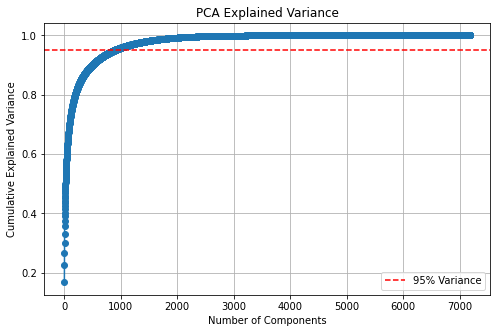

Optimal number of components for 95% variance: 889


In [19]:
from sklearn.decomposition import PCA
pca = PCA()  # Adjust based on your dataset
pca.fit(X_train)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal number of components to retain at least 95% variance
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Optimal number of components for 95% variance:", optimal_n_components)

In [20]:
pca = PCA(n_components=889)  # Adjust based on your dataset
X_train_reduced = pca.fit_transform(X_train)
X_val_reduced = pca.transform(X_val)
X_test_reduced = pca.transform(relevant_test_features_scaled_df)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# List of models to evaluate
models = [XGBRegressor(objective='reg:squarederror',random_state=42,n_estimators=50,max_depth=6,min_child_weight=5,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,tree_method='hist'),
          RandomForestRegressor(n_estimators=50,max_depth=15,max_features="sqrt",min_samples_split=10,min_samples_leaf=5,n_jobs=-1),
          MLPRegressor(hidden_layer_sizes=(50, 50), solver="adam", batch_size=64, learning_rate="adaptive", learning_rate_init=0.01, max_iter=500)]

# Evaluate each model
results = []
for model in models:
    result = evaluate_model(model, X_train_reduced, y_train, X_val_reduced, y_val, X_test=X_test_reduced, Y_test=y_test)
    results.append(result)

# If you want, you can compile the results into a DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

XGBRegressor model - Validation Set
RMSE: 20.84997961263002
S-score: 15.23113891302213
---------------------
XGBRegressor model - Test Set
Test RMSE: 34.68679738391494
Test score: 66.8753106540838
---------------------
RandomForestRegressor model - Validation Set
RMSE: 28.471208605420998
S-score: 35.88773852816621
---------------------
RandomForestRegressor model - Test Set
Test RMSE: 43.979017145505516
Test score: 186.45304155123785
---------------------
MLPRegressor model - Validation Set
RMSE: 4.490247562686357
S-score: 0.4291860842422789
---------------------
MLPRegressor model - Test Set
Test RMSE: 29.72644901354317
Test score: 32.647355217364286
---------------------
                   model   rmse_val    s_score  rmse_test  test_score
0           XGBRegressor  20.849980  15.231139  34.686797   66.875311
1  RandomForestRegressor  28.471209  35.887739  43.979017  186.453042
2           MLPRegressor   4.490248   0.429186  29.726449   32.647355
